## Suma de imágenes

Logos: https://www.kaggle.com/datasets/kkhandekar/popular-brand-logos-image-dataset

1481 popular brand logos

UCF-QNRF_ECCV18: https://www.kaggle.com/datasets/kokunsyu/ucf-qnrf-eccv18

 Dataset utilizado para la tarea de conteo de multitudes (crowd counting). Contiene imágenes de escenas densamente pobladas, como manifestaciones y eventos públicos.

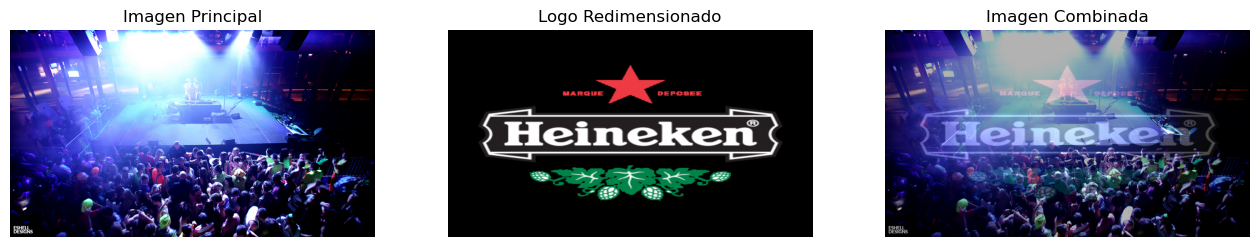

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar las imágenes
#base_url = 'https://raw.githubusercontent.com/Marian2057/AprendizajeAutomatico2/main/datos_PDI/logos/img_0002.jpg'

# Función para cargar imágenes
#def load_image(filename):
#    url = base_url + filename
#    return cv2.imread(url)

#imagen_principal = cv2.imread(base_url)

imagen_principal = cv2.imread('datos_PDI/logos/img_0002.jpg')
logo = cv2.imread('datos_PDI/logos/Heineken-logo-400x400.png')

# Convertir las imágenes de BGR a RGB (OpenCV usa BGR por defecto)
imagen_principal_rgb = cv2.cvtColor(imagen_principal, cv2.COLOR_BGR2RGB)
logo_rgb = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)

# Obtener el tamaño de la imagen principal
alto, ancho = imagen_principal_rgb.shape[:2]

# Redimensionar el logo al tamaño de la imagen principal
logo_redimensionado = cv2.resize(logo_rgb, (ancho, alto))

# Definir pesos para la combinación ponderada
peso_imagen_principal = 0.7
peso_logo = 1 - peso_imagen_principal

# Combinar las imágenes usando una suma ponderada
imagen_combinada = cv2.addWeighted(imagen_principal_rgb, peso_imagen_principal, logo_redimensionado, peso_logo, 0)

# Mostrar las imágenes usando matplotlib
plt.figure(figsize=(16, 12))

plt.subplot(1, 3, 1)
plt.title('Imagen Principal')
plt.imshow(imagen_principal_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Logo Redimensionado')
plt.imshow(logo_redimensionado)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Imagen Combinada')
plt.imshow(imagen_combinada)
plt.axis('off')

plt.show()

## Diferencia de imágenes

Ejemplo de substracción de fondo para detección de movimiento e intrusos

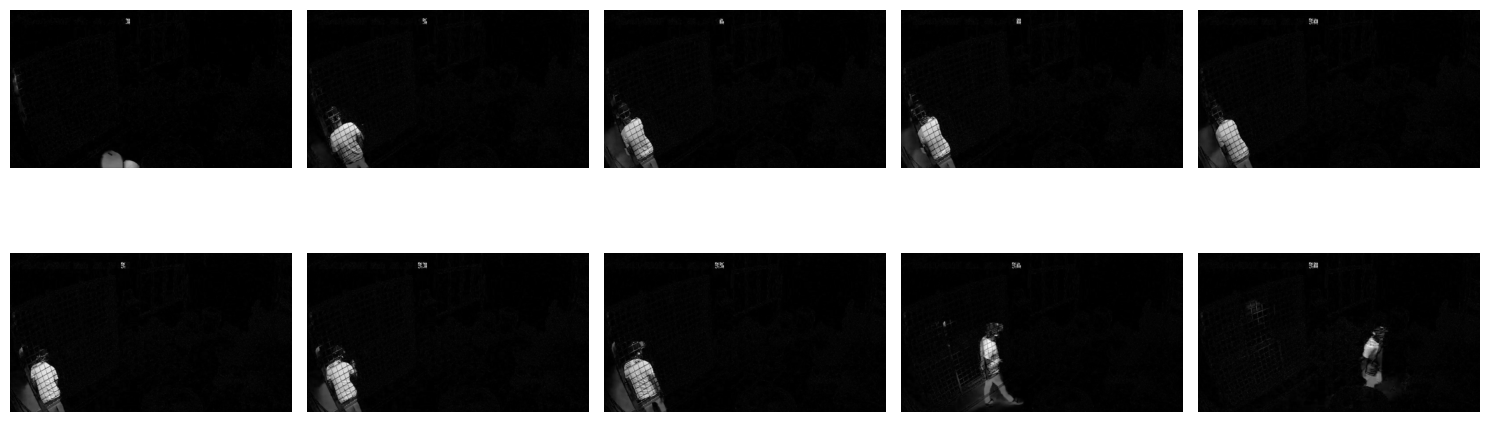

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ruta del video
video_path = 'datos_PDI/ladron.mp4'

# Abrir el video
cap = cv2.VideoCapture(video_path)

# Leer los primeros 60 frames para obtener el fondo inicial
for _ in range(60):
    ret, fondo = cap.read()
if not ret:
    print("Error al leer el video.")
    cap.release()
    cv2.destroyAllWindows()
    exit()

# Convertir el último frame de los primeros 60 frames a escala de grises
fondo = cv2.cvtColor(fondo, cv2.COLOR_BGR2GRAY)

# Número de frames a procesar
num_frames_to_process = 10

# Crear una figura con 2 filas y 5 columnas
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Convertir el objeto de ejes a una lista para iterar fácilmente
axes = axes.flatten()

for i in range(num_frames_to_process):
    # Dejar pasar 50 frames
    for _ in range(50):
        ret, frame = cap.read()
        if not ret:
            break

    # Convertir el frame actual a escala de grises
    gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Calcular la diferencia entre el fondo y el frame actual
    diferencia = cv2.absdiff(fondo, gris)

    # Aplicar un umbral para obtener una imagen binaria
    _, umbral = cv2.threshold(diferencia, 50, 255, cv2.THRESH_BINARY)


    # Encontrar contornos en la imagen binaria
    contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Inicializar el bounding box más grande
    bbox_max = None
    max_area = 0
    # Iterar sobre todos los contornos para encontrar el bounding box más grande
    for contorno in contornos:
        (x, y, w, h) = cv2.boundingRect(contorno)
        area = w * h
        if area > max_area:
            max_area = area
            bbox_max = (x, y, w, h)
    # Dibujar el bounding box más grande
    if bbox_max is not None:
        (x, y, w, h) = bbox_max
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 4)
    # Convertir el frame de BGR a RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


    # Mostrar la imagen diferencia entre fondo y actual, en escala de grises
    axes[i].imshow(diferencia, cmap='gray')
    # Mostrar el frame en la cuadrícula
    #axes[i].imshow(frame_rgb)

    axes[i].axis('off')

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar la figura con todos los frames
plt.show()

# Liberar recursos
cap.release()
cv2.destroyAllWindows()

## Segmentación color y multiplicación

**Corn or Maize Leaf Disease Dataset**

A dataset for classification of corn or maize plant leaf diseases

Dataset Description:
- 0: Common Rust - 1306 images
- 1: Gray Leaf Spot - 574 images
- 2: Blight -1146 images
- 3: Healthy - 1162 images

https://www.kaggle.com/datasets/smaranjitghose/corn-or-maize-leaf-disease-dataset

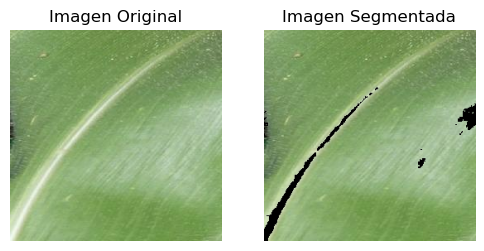

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
import os

# Ruta a una imagen de ejemplo
image_path = 'datos_PDI/Corn_Maize_Leaf/Corn_Health (1023).jpg'

# Cargar la imagen
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir a espacio de color HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definir los rangos de color para segmentar el color verde
# LOCALIZACION EN HSV:
# H: 120º en la rueda, pero en OpenCV va de 0-180º --> el G está centrado en 60º
# S: desde un rango bajo a máximo (para cubrirnos)
# V: ídem S
lower_green = np.array([25, 40, 40])
upper_green = np.array([80, 255, 255])

# Crear una máscara con los colores definidos
mask = cv2.inRange(hsv, lower_green, upper_green)

# Aplicar la máscara a la imagen original
segmented_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Mostrar la imagen original y la segmentada
plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen Segmentada')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()

**PREGUNTAS**

- ¿Por qué se producen los huecos en la imagen segmentada?

- ¿Qué (buen) comportamiento observa en la segmentación de la imagen saludable 1019?


   TIP: está relacionada a la ventaja del desacoplamiento "cromaticidad / brillo" que hace el modelo HSV respecto al RGB.
   
- ¿Cómo podría utilizar la segmentación color para hacer un "clasificador de salud" de las hojas?

1. ¿Por qué se producen los huecos en la imagen segmentada?
Los huecos en la imagen segmentada pueden deberse a varias razones:

Rango de color ajustado: El rango definido para el verde (específicamente los límites lower_green y upper_green) puede no cubrir toda la variabilidad de tonos presentes en la hoja. Si algunas partes de la hoja tienen un verde más oscuro o claro de lo esperado, no se segmentarán correctamente y aparecerán como "huecos".

Ruido o variaciones naturales: El ruido en la imagen o la variabilidad natural en la textura de la hoja, como sombras, reflejos o pequeños detalles, pueden estar fuera del rango de color especificado, creando huecos en la segmentación.

Límite de saturación y brillo: La hoja puede tener áreas donde el brillo o la saturación caen fuera del rango definido, especialmente en áreas más cercanas al borde o donde hay sombras. Esto lleva a que ciertas partes no sean detectadas como verdes.

2. ¿Qué buen comportamiento observa en la segmentación de la imagen saludable 1019?
Un buen comportamiento que puedes observar es que el modelo HSV separa mejor la cromaticidad (color) del brillo. En la imagen saludable, aunque haya variaciones de luz y sombra en la hoja, el uso del espacio de color HSV permite que la segmentación se enfoque más en el color (verde en este caso), mientras que ignora las variaciones de brillo. Esto es una ventaja frente al espacio de color RGB, donde el brillo y la cromaticidad están acoplados, lo que dificultaría la segmentación en presencia de sombras o reflejos.

3. ¿Cómo podría utilizar la segmentación por color para hacer un "clasificador de salud" de las hojas?
La segmentación por color puede ser una herramienta útil para clasificar la salud de las hojas, de la siguiente manera:

Hojas saludables suelen tener un verde uniforme. Mediante la segmentación, se puede verificar si la hoja tiene un color predominantemente verde y uniforme en toda su superficie.

Hojas enfermas podrían mostrar colores no verdes, como amarillo, marrón o incluso negro, debido a la presencia de plagas, enfermedades o estrés. Al ajustar el rango de color de segmentación para detectar estos colores, podrías identificar áreas problemáticas en la hoja.

Clasificación automática: Al contar los píxeles verdes frente a los píxeles de otros colores (amarillos, marrones), podrías establecer umbrales para determinar si una hoja está sana o enferma. Un clasificador podría utilizar la proporción de píxeles verdes en comparación con otros colores para evaluar la salud.

## PROYECTO

**Clasificación de frutas**

Dataset: "Fruits fresh and rotten for classification"

(parte del dataset "Fresh and Rotten Classification")

https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification



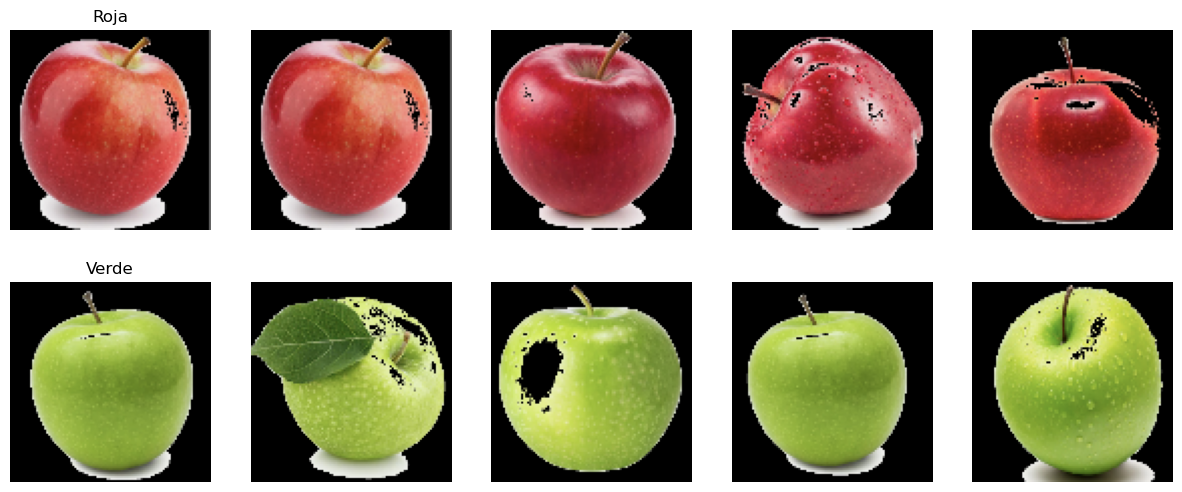

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Definir las rutas a las carpetas de train y test
train_dir = 'datos_PDI/Fruits_classification/train'
test_dir = 'datos_PDI/Fruits_classification/test'
classes = ['roja', 'verde']
image_size = (100, 100)  # Tamaño al que redimensionaremos las imágenes


def cambiar_cercanos_al_blanco_a_negro(img, umbral=240):
    """
    Cambia los valores cercanos al blanco por negro en la imagen.

    :param img: Imagen en formato BGR.
    :param umbral: Valor del canal de intensidad (V) en HSV. Los píxeles con valores
                   de intensidad mayores que este umbral se convertirán en negro.
    :return: Imagen con los valores cercanos al blanco cambiados a negro.
    """
    # Convertir la imagen de BGR a HSV
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Crear una máscara donde los valores de intensidad (V) son mayores que el umbral
    _, _, V = cv2.split(hsv_image)
    mascara = V > umbral
    # Crear una imagen de salida donde los valores cercanos al blanco se cambian a negro
    imagen_salida = img.copy()
    imagen_salida[mascara] = [0, 0, 0]
    return imagen_salida

# Función para cargar y redimensionar imágenes
def load_and_resize_images(base_dir, classes, num_images, size):
    images = []
    labels = []

    for fruit in classes:
        for i in range(1, num_images + 1):
            img_path = os.path.join(base_dir, f'{fruit}{i}.png')
            img = cv2.imread(img_path)
            # Verificar que la imagen se ha cargado correctamente
            if img is not None:
                img = cambiar_cercanos_al_blanco_a_negro(img)
                # Redimensionar imagen
                img_resized = cv2.resize(img, size)
                images.append(img_resized)
                labels.append(fruit)
            else:
                print(f"ERROR: no se pudo cargar imagen {img_path}")
    return images, labels

# Cargar y redimensionar imágenes y etiquetas de entrenamiento (5 imágenes por fruta)
train_images, train_labels = load_and_resize_images(train_dir, classes, num_images=5, size=image_size)

# Cargar y redimensionar imágenes y etiquetas de prueba (2 imágenes por fruta)
test_images, test_labels = load_and_resize_images(test_dir, classes, num_images=2, size=image_size)

# Configurar la visualización
num_classes = len(classes)
num_images_per_class = len([label for label in train_labels if label == classes[0]])

plt.figure(figsize=(15, num_classes * 3))  # Ajustar el tamaño según sea necesario

for idx, fruit in enumerate(classes):
    # Encontrar los índices de las imágenes de la fruta actual
    fruit_indices = [i for i, label in enumerate(train_labels) if label == fruit]
    # Mostrar todas las imágenes de la fruta en la fila correspondiente
    for j, image_idx in enumerate(fruit_indices):
        plt.subplot(num_classes, num_images_per_class, idx * num_images_per_class + j + 1)
        plt.imshow(cv2.cvtColor(train_images[image_idx], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        if j == 0:
            plt.title(fruit.capitalize())

plt.show()

In [56]:
len(train_images)

10

In [57]:
print(f"train_images shape: {np.array(train_images).shape}")

train_images shape: (10, 100, 100, 3)


In [58]:
train_labels

['roja',
 'roja',
 'roja',
 'roja',
 'roja',
 'verde',
 'verde',
 'verde',
 'verde',
 'verde']

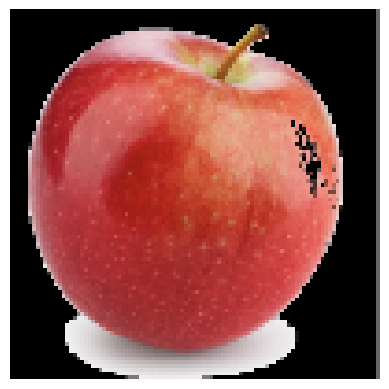

'roja'

In [59]:
# mostrar imagen 1 de train_images, con su label

plt.imshow(cv2.cvtColor(train_images[0], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

train_labels[0]

**PROGRAMAR AQUÍ LA SOLUCIÓN**:

Paso 1: Codificación de etiquetas
Primero, vamos a convertir las etiquetas de "roja" y "verde" a un formato numérico y luego al formato one-hot encoding, que es lo que el modelo necesita para clasificar las imágenes correctamente.

In [60]:
# Paso 1: Codificación de etiquetas
# Diccionario para convertir etiquetas de texto a números
label_dict = {'roja': 0, 'verde': 1}

# Convertir las etiquetas de entrenamiento y prueba a números
train_labels_numeric = np.array([label_dict[label] for label in train_labels])
test_labels_numeric = np.array([label_dict[label] for label in test_labels])

# Convertir las etiquetas a formato one-hot
train_labels_one_hot = to_categorical(train_labels_numeric, num_classes=2)
test_labels_one_hot = to_categorical(test_labels_numeric, num_classes=2)


Paso 2: Normalización de imágenes
Vamos a asegurarnos de que las imágenes tengan valores entre 0 y 1, dividiendo cada píxel por 255.

In [61]:
# Convertir imágenes a arrays numpy y normalizar los valores entre 0 y 1
train_images = np.array(train_images, dtype=np.float32) / 255.0
test_images = np.array(test_images, dtype=np.float32) / 255.0

In [62]:
print("Estadísticas de test_images:")
print("Mínimo:", np.min(test_images))
print("Máximo:", np.max(test_images))
print("Promedio:", np.mean(test_images))
print("Desviación estándar:", np.std(test_images))

Estadísticas de test_images:
Mínimo: 0.0
Máximo: 0.9411765
Promedio: 0.32916087
Desviación estándar: 0.31997666


In [63]:
print("Rango de valores en test_images:", np.min(test_images), "a", np.max(test_images))

Rango de valores en test_images: 0.0 a 0.9411765


In [64]:
print("Ejemplo de valores en train_images:", train_images[0])

Ejemplo de valores en train_images: [[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.39607844 0.39607844 0.39607844]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.39607844 0.39607844 0.39607844]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.39607844 0.39607844 0.39607844]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.39607844 0.39607844 0.39607844]]

 [[0.         0.         0.        ]
 

Paso 3: Definir el modelo
Vamos a crear un modelo simple de red neuronal convolucional (CNN) para la clasificación de las imágenes. El modelo tendrá varias capas convolucionales y densas.

In [65]:
from tensorflow.keras import layers, models

# Definir el modelo de red neuronal convolucional
model = models.Sequential([
    # Primera capa convolucional
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Segunda capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Tercera capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Aplanar las salidas de las capas convolucionales para conectarlas a la red densa
    layers.Flatten(),
    
    # Capa densa con 64 neuronas
    layers.Dense(64, activation='relu'),
    
    # Capa de salida con 2 neuronas (roja o verde)
    layers.Dense(2, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Paso 4: Entrenamiento del modelo
Entrenamos el modelo con las imágenes de entrenamiento y validamos con las imágenes de prueba.

In [66]:
history = model.fit(train_images, train_labels_one_hot, 
                    validation_data=(test_images, test_labels_one_hot), 
                    epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6962 - val_accuracy: 1.0000 - val_loss: 0.5128
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 1.0000 - loss: 0.4817 - val_accuracy: 0.5000 - val_loss: 0.5065
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7000 - loss: 0.4150 - val_accuracy: 1.0000 - val_loss: 0.1921
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.1612 - val_accuracy: 1.0000 - val_loss: 0.1342
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.1058 - val_accuracy: 1.0000 - val_loss: 0.0279
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.0211 - val_accuracy: 1.0000 - val_loss: 0.0142
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0176
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 0.0168
Ep

Paso 5: Evaluación del modelo
Después de entrenar, evaluamos el rendimiento del modelo con las imágenes de prueba.

In [67]:
# Evaluar el modelo con los datos de prueba
test_loss, test_accuracy = model.evaluate(test_images, test_labels_one_hot)
print(f"Precisión en los datos de prueba: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0031
Precisión en los datos de prueba: 100.00%


In [68]:
predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Paso 6: Visualizar una predicción
Finalmente, mostramos una imagen de prueba y su predicción correspondiente.

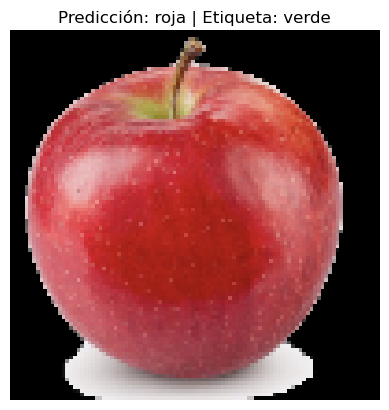

In [69]:
# Asegúrate de que test_images esté normalizado entre 0 y 1
# Si train_images ha sido normalizado de manera similar, haz lo mismo aquí.

# Mostrar la primera imagen de prueba y su predicción correspondiente
plt.imshow(cv2.cvtColor(test_images[0], cv2.COLOR_BGR2RGB))  # Mostrar la imagen normalizada
plt.title(f"Predicción: {'roja' if np.argmax(predictions[0]) == 0 else 'verde'} | Etiqueta: {'roja' if train_labels[0] == 0 else 'verde'}")
plt.axis('off')
plt.show()

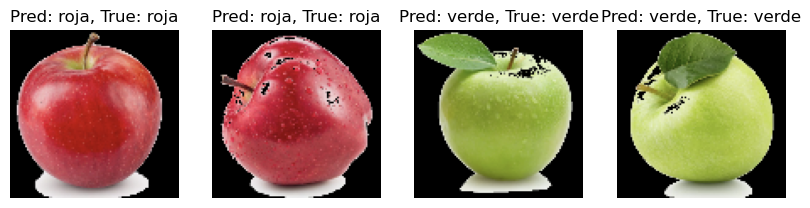

In [72]:
# importar to_categorical
from tensorflow.keras.utils import to_categorical

# Paso 6: Visualizar una predicción
def mostrar_predicciones(images, labels, predictions):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(2, len(images), i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        pred_label = 'roja' if predictions[i][0] > 0.5 else 'verde'  # Usar un umbral para la predicción
        plt.title(f'Pred: {pred_label}, True: {labels[i]}')
    plt.show()

# Mostrar las predicciones para las imágenes de prueba
mostrar_predicciones(test_images, test_labels, predictions)